## **85-Table with bars**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
from matplotlib.patches import Ellipse
import matplotlib.patches as mpatches
from matplotlib import cm
from highlight_text import fig_text, ax_text
from ast import literal_eval

from PIL import Image
import urllib
import os
import requests
import json

# -- For Logos and images
from matplotlib.transforms import Bbox
class BboxLocator:
    def __init__(self, bbox, transform):
        self._bbox = bbox
        self._transform = transform
    def __call__(self, ax, renderer):
        _bbox = self._transform.transform_bbox(self._bbox)
        return ax.figure.transFigure.inverted().transform_bbox(_bbox)

In [2]:
def draw_player_image_at_ax(player_id, ax, grayscale=False):
    '''
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/playerimages/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{player_id:.0f}.png'))
    if grayscale:
        club_icon = club_icon.convert('LA')
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

def draw_club_image_at_ax(team_id, ax, grayscale=False):
    '''
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png'))
    if grayscale:
        club_icon = club_icon.convert('LA')
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

## 1) SOT

In [3]:
liga = pd.read_excel(r"C:\Users\lolen\Downloads\Wyscout Data\2425\AttEng.xlsx")# 23-24

In [4]:
liga

,Player,Team,Team within selected timeframe,Position,Age,Market value,Matches played,Minutes played,Duels per 90,"Duels won, %",...,Key passes per 90,Passes to final third per 90,"Accurate passes to final third, %",Passes to penalty area per 90,"Accurate passes to penalty area, %",Through passes per 90,"Accurate through passes, %",Deep completions per 90,Progressive passes per 90,"Accurate progressive passes, %"
0,E. Haaland,Manchester City,Manchester City,CF,24,180000000,36,3408,12.31,43.35,...,0.34,0.69,88.46,0.63,58.33,0.08,33.33,0.87,0.69,76.92
1,P. Foden,Manchester City,Manchester City,"AMF, RCMF, RW",24,150000000,30,2338,12.55,43.56,...,0.50,2.89,85.33,3.31,67.44,0.69,66.67,1.89,3.50,80.22
2,B. Saka,Arsenal,Arsenal,"RWF, RW, RAMF",23,140000000,31,2581,22.07,43.29,...,1.05,1.43,78.05,3.80,65.14,0.28,50.00,2.06,5.09,83.56
3,D. Rice,Arsenal,Arsenal,"LCMF, RCMF",26,120000000,36,3171,12.01,51.06,...,0.23,5.90,86.06,1.76,64.52,0.14,60.00,0.96,4.57,86.34
4,M. Ødegaard,Arsenal,Arsenal,RCMF,26,110000000,24,1962,14.72,44.24,...,0.60,5.50,89.17,5.32,67.24,1.38,46.67,2.66,7.11,92.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,Murillo,Nottingham Forest,Nottingham Forest,"LCB, CB",22,0,21,2079,9.83,62.56,...,0.09,5.06,62.39,1.04,45.83,0.56,30.77,0.35,7.10,67.68
314,Y. Minteh,Brighton,Brighton,"RAMF, RW",20,0,24,1398,23.05,41.62,...,0.71,1.67,65.38,3.41,49.06,0.39,50.00,1.74,3.67,84.21
315,C. Baleba,Brighton,Brighton,"RCMF, RDMF, DMF",21,0,24,2007,20.13,50.11,...,0.13,6.32,79.43,1.21,70.37,0.67,33.33,0.67,4.66,87.50
316,J. Enciso,Brighton,Brighton,"AMF, CF",21,0,22,1189,23.54,43.73,...,0.61,3.03,72.50,2.57,50.00,0.38,20.00,1.21,3.41,71.11


In [5]:
codes_logo = { "Liverpool" :8650,  "Manchester City" :  8456,"Arsenal" :9825, "Tottenham Hotspur" :  8586, "Brighton" :10204,
                          "Leeds United" :8463,
                         "Chelsea" :8455,
                      "Brentford" :9937,
               "Newcastle United" :10261,
                         "Fulham" :9879, "Crystal Palace" :9826,
              "Manchester United" :10260,
                         "Everton" :8668,
                     "Southampton":8466,
                     "Aston Villa" :10252,
              "Nott'ham Forest":10203,
       "Wolverhampton Wanderers":8602,
                        "West Ham United" :8654,'Burnley':8191,
                       "Leicester City" : 8197,
                   "Bournemouth" :8678,"Luton Town":8346,'Sheffield United':8657}

liga['team_id'] = liga['Team'].map(codes_logo)

In [6]:
liga['Team'].unique()

array(['Manchester City', 'Arsenal', 'Newcastle United', 'Chelsea',
       'Liverpool', 'Manchester United', 'Tottenham Hotspur',
       'West Ham United', 'Aston Villa', 'Crystal Palace',
       'Wolverhampton Wanderers', 'Brighton', 'Everton',
       'Nottingham Forest', 'Brentford', 'Fulham', 'Bournemouth',
       'Napoli', 'Southampton', nan, 'Leicester City', 'Flamengo',
       'Ipswich Town', 'Burnley', 'Augsburg', 'Anderlecht', 'Botafogo',
       'West Bromwich Albion', 'Birmingham City', 'Fluminense',
       'Derby County', 'Charlotte FC', 'Middlesbrough', 'Southampton U21'],
      dtype=object)

In [29]:
data_clean = liga.sort_values(by="Shots per 90",ascending=False)[:15]
data_clean =data_clean[data_clean["Minutes played"] > 1000]

In [30]:
data_clean = data_clean[['Player','Team','Position','Age','Minutes played','Shots per 90','Shots on target, %','team_id']]

In [31]:
data_clean = data_clean.sort_values(by="Shots per 90",ascending=True)[:15]
data_clean = data_clean.dropna(subset=['team_id'])

In [33]:
data_clean = data_clean.sort_values(by="Shots per 90",ascending=False)[:10]
data_clean = data_clean.sort_values(by="Shots per 90",ascending=True)

In [34]:
data_clean

,Player,Team,Position,Age,Minutes played,Shots per 90,"Shots on target, %",team_id
9,A. Isak,Newcastle United,CF,25,2494,3.07,45.88,10261.0
241,A. Semenyo,Bournemouth,"RAMF, LAMF",25,2411,3.14,29.76,8678.0
37,Mohamed Salah,Liverpool,"RAMF, RWF",32,3118,3.20,48.65,8650.0
36,E. Eze,Crystal Palace,"LWF, LW, AMF",26,1964,3.25,29.58,9826.0
125,N. Madueke,Chelsea,RAMF,22,1843,3.52,38.89,8455.0
60,A. Garnacho,Manchester United,"LAMF, LWF, RAMF",20,2030,3.59,38.96,10260.0
110,João Félix,Chelsea,"AMF, CF, LAMF",25,1154,3.63,41.30,8455.0
316,J. Enciso,Brighton,"AMF, CF",21,1189,3.71,42.86,10204.0
0,E. Haaland,Manchester City,CF,24,3408,3.75,56.34,8456.0
171,J. Durán,Aston Villa,CF,21,1458,3.83,46.77,10252.0


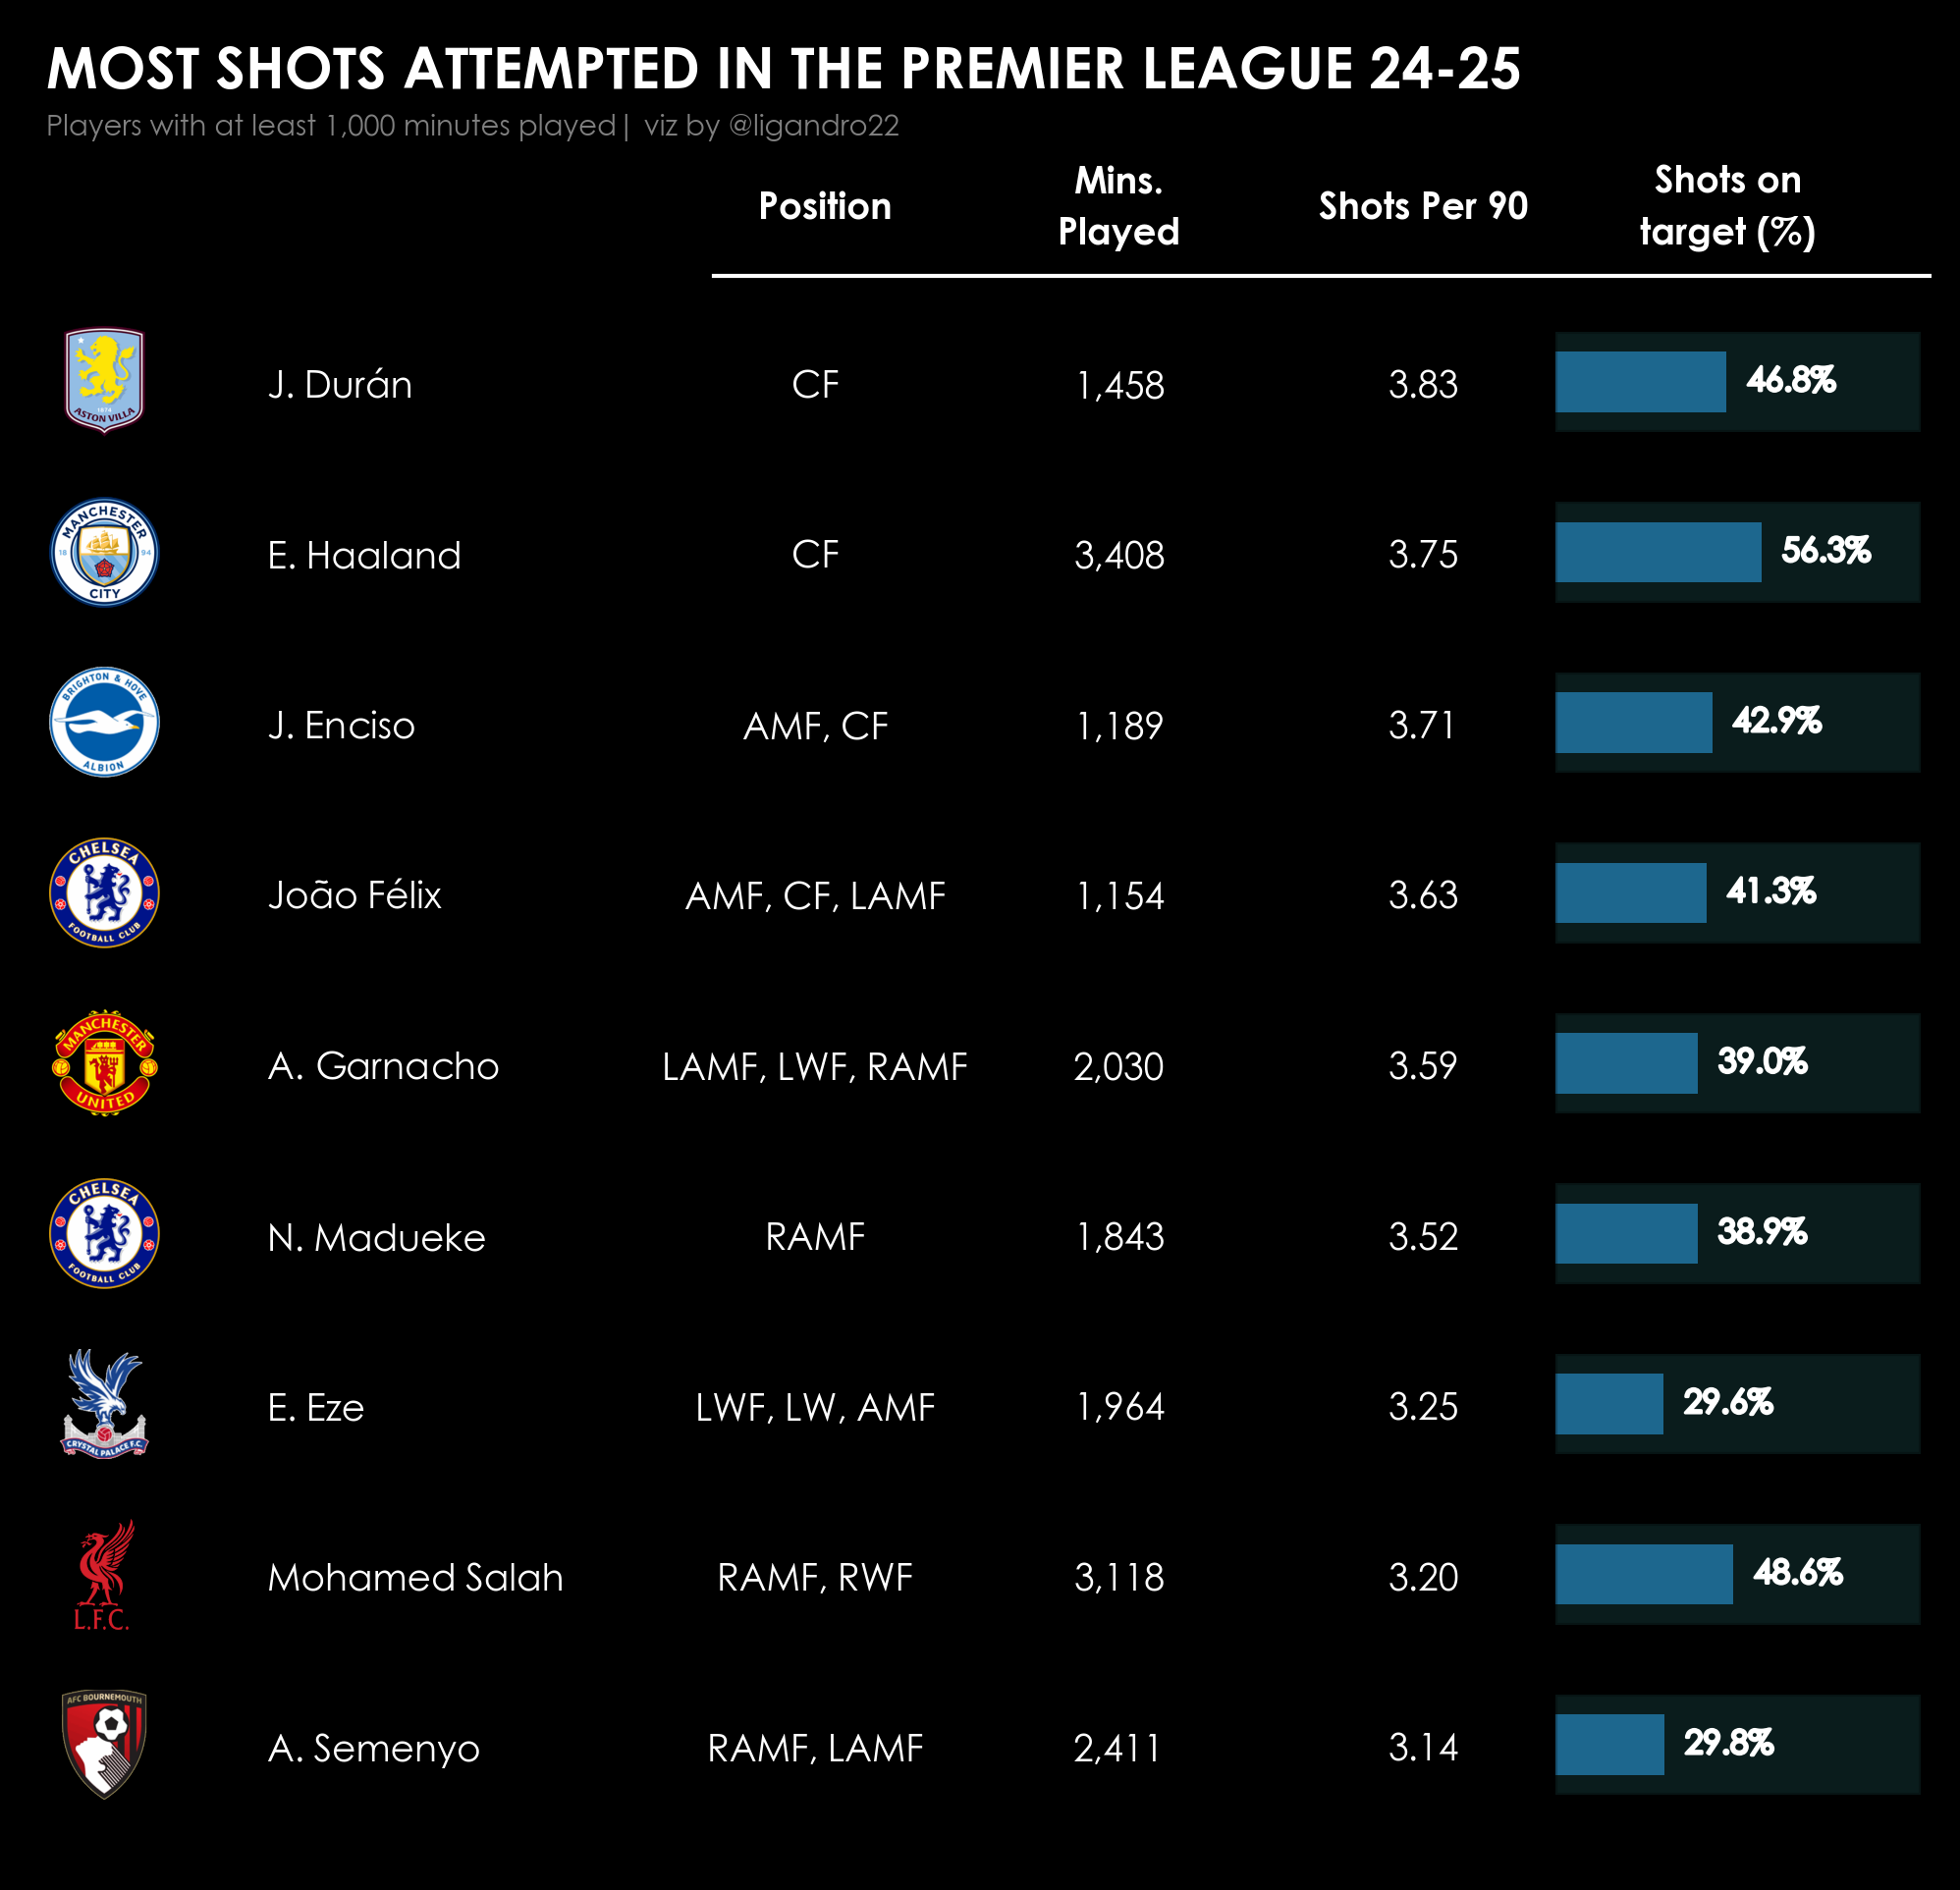

In [17]:
fig = plt.figure(figsize=(8,8), dpi=300)
ax = plt.subplot()



fig.set_facecolor('black')
ax.patch.set_facecolor('black')

nrows = data_clean.shape[0]
ncols = data_clean.shape[1] 

ax.set_xlim(0, ncols + 1)
ax.set_ylim(-.65, nrows + 1)

x0, y0 = ax.transAxes.transform((0, 0)) # lower left in pixels
x1, y1 = ax.transAxes.transform((1, 1)) # upper right in pixes
dx = x1 - x0
dy = y1 - y0
maxd = max(dx, dy)
width = .26 * maxd / dx
height = .81 * maxd / dy

# Iterate
for y in range(0, nrows):
    bbox = Bbox.from_bounds(-0.5, y - .295, 1, .65)
    logo_ax = fig.add_axes([0, 0, 0, 0], axes_locator=BboxLocator(bbox, ax.transData))
    draw_club_image_at_ax(data_clean['team_id'].iloc[y], logo_ax)
    ax_text(
        x=0.8, y=y,
        s=data_clean['Player'].iloc[y],
        weight='bold', size=9,color="white",
        ha='left', va='center', ax=ax, family='STXihei'
    )
    ax_text(
        x=3.5, y=y,
        s=data_clean['Position'].iloc[y],
        size=9,color="white",
        ha='center', va='center', ax=ax, family='STXihei'
    ) 
    ax_text(
        x=5, y=y,
        s=f"{data_clean['Minutes played'].iloc[y]:,.0f}",
        size=9,color="white",
        ha='center', va='center', ax=ax, family='STXihei'
    )
    ax_text(
        x=6.5, y=y,
        s=f"{data_clean['Shots per 90'].iloc[y]:,.2f}",
        size=9,color="white",
        ha='center', va='center', ax=ax, family='STXihei'
    )
   
    bbox = Bbox.from_bounds(7.15, y - .295, 1.8, .65)
    battery_ax = fig.add_axes([0, 0, 0, 0], axes_locator=BboxLocator(bbox, ax.transData))
    battery_ax.set_xlim(0,100)
    battery_ax.barh(y=.5, width=data_clean['Shots on target, %'].iloc[y], height=.3, alpha=.85)
    battery_ax.barh(y=.5, width=100, height=.5, alpha=.25, color='#287271', ec='black')
    text_ = battery_ax.annotate(
        xy=(data_clean['Shots on target, %'].iloc[y], .5),
        xytext=(5,0), family='STXihei',
        textcoords='offset points',color="white",
        text=f"{data_clean['Shots on target, %'].iloc[y]/100:.1%}",
        ha='left', va='center',
        size=8
    )
    text_.set_path_effects(
                [path_effects.Stroke(linewidth=.75, foreground="white"), 
                path_effects.Normal()]
            )
    battery_ax.set_axis_off()
    


ax.set_axis_off()

ax_text(
    x=3.55, y=nrows + .05,
    s='Position',color="white",
    size=9,font="Century Gothic",
    ha='center', va='center', ax=ax,
    textalign='center', weight='bold'
)

ax_text(
    x=5, y=nrows + .05,
    s='Mins.\nPlayed',
    size=9,font="Century Gothic",color="white",
    ha='center', va='center', ax=ax,
    textalign='center', weight='bold'
)
ax_text(
    x=6.5, y=nrows + .05,
    s='Shots Per 90',
    size=9,font="Century Gothic",color="white",
    ha='center', va='center', ax=ax,
    textalign='center', weight='bold'
)
ax_text(
    x=8, y=nrows + .05,
    s='Shots on\ntarget (%)',color="white",
    size=9,font="Century Gothic",
    ha='center', va='center', ax=ax,
    textalign='center', weight='bold'
)

ax.plot([3, ax.get_xlim()[1]], [nrows - .35, nrows - .35], lw=1, color='white', zorder=3)

fig_text(
    x = 0.1, y = .858, 
    s = "MOST SHOTS ATTEMPTED IN THE PREMIER LEAGUE 24-25",
    va = "bottom", ha = "left",color="white",
    fontsize = 14,font = "Century Gothic", weight = "bold"
)
fig_text(
	x = 0.1, y = .84, 
    s = "Players with at least 1,000 minutes played| viz by @ligandro22",
	va = "bottom", ha = "left",
	fontsize = 7, color = "grey", font = "Century Gothic"
)

plt.savefig("AFC VS ARS.jpg",dpi =500, bbox_inches='tight')

## 2) Progressive Passes

In [60]:
liga = pd.read_excel(r"C:\Users\lolen\Downloads\Wyscout Data\2425\MidEngM.xlsx")# 23-24

In [69]:
liga.columns

Index(['Player', 'Team', 'Position', 'Age', 'Matches played', 'Minutes played',
       'Foot', 'Successful defensive actions per 90', 'Defensive duels per 90',
       'Defensive duels won, %', 'Aerial duels per 90', 'Aerial duels won, %',
       'Sliding tackles per 90', 'PAdj Sliding tackles',
       'Shots blocked per 90', 'Interceptions per 90', 'PAdj Interceptions',
       'Fouls per 90', 'Successful attacking actions per 90', 'Goals per 90',
       'Non-penalty goals per 90', 'xG per 90', 'Head goals per 90',
       'Shots per 90', 'Shots on target, %', 'Goal conversion, %',
       'Assists per 90', 'Crosses per 90', 'Accurate crosses, %',
       'Crosses from left flank per 90', 'Accurate crosses from left flank, %',
       'Crosses from right flank per 90',
       'Accurate crosses from right flank, %', 'Crosses to goalie box per 90',
       'Dribbles per 90', 'Successful dribbles, %', 'Offensive duels per 90',
       'Offensive duels won, %', 'Touches in box per 90',
       'Pr

In [ ]:
Progressive passes per 90
Accurate progressive passes, %

In [61]:
codes_logo = { "Liverpool" :8650,  "Manchester City" :  8456,"Arsenal" :9825, "Tottenham Hotspur" :  8586, "Brighton" :10204,
                          "Leeds United" :8463,
                         "Chelsea" :8455,
                      "Brentford" :9937,
               "Newcastle United" :10261,
                         "Fulham" :9879, "Crystal Palace" :9826,
              "Manchester United" :10260,
                         "Everton" :8668,
                     "Southampton":8466,
                     "Aston Villa" :10252,
              "Nott'ham Forest":10203,
       "Wolverhampton Wanderers":8602,
                        "West Ham United" :8654,'Burnley':8191,
                       "Leicester City" : 8197,
                   "Bournemouth" :8678,"Luton Town":8346,'Sheffield United':8657}

liga['team_id'] = liga['Team'].map(codes_logo)

In [62]:
data_clean = liga.sort_values(by="Progressive passes per 90",ascending=False)
data_clean = data_clean[data_clean['Position'].str.contains('MF')]
data_clean =data_clean[data_clean["Minutes played"] > 1000]

In [63]:
data_clean = data_clean[['Player','Team','Position','Age','Minutes played','Progressive passes per 90','Accurate progressive passes, %','team_id']]

In [64]:
data_clean = data_clean.sort_values(by="Progressive passes per 90",ascending=False)[:11]
data_clean

,Player,Team,Position,Age,Minutes played,Progressive passes per 90,"Accurate progressive passes, %",team_id
13,Bruno Fernandes,Manchester United,"AMF, LCMF, CF",30,3355,9.35,81.95,10260.0
32,K. De Bruyne,Manchester City,"AMF, RCMF",33,1509,9.24,86.45,8456.0
90,Casemiro,Manchester United,"RDMF, RCMF, LDMF",32,1572,9.05,73.42,10260.0
76,A. Iwobi,Fulham,"LAMF, RAMF",28,2257,9.01,83.63,9879.0
132,M. Damsgaard,Brentford,"AMF, LCMF, LWF",24,2108,8.54,73.00,9937.0
6,E. Fernández,Chelsea,"LDMF, LCMF, RDMF",23,2830,8.30,76.25,8455.0
15,Lucas Paquetà,West Ham United,"LCMF, AMF, LDMF",27,2107,7.90,74.05,8654.0
98,B. Gilmour,Napoli,"RDMF, DMF, LCMF",23,1305,7.66,81.08,NaN
124,Jorginho,Arsenal,"DMF, LCMF",33,1023,7.65,80.46,9825.0
74,Y. Tielemans,Aston Villa,"LDMF, LCMF, AMF",27,3032,7.51,75.89,10252.0


In [65]:
data_clean = data_clean.dropna(subset=['team_id'])

In [66]:
data_clean = data_clean.sort_values(by="Progressive passes per 90",ascending=True)

In [67]:
data_clean

,Player,Team,Position,Age,Minutes played,Progressive passes per 90,"Accurate progressive passes, %",team_id
10,M. Caicedo,Chelsea,"RDMF, LDMF",23,2881,7.43,78.57,8455.0
74,Y. Tielemans,Aston Villa,"LDMF, LCMF, AMF",27,3032,7.51,75.89,10252.0
124,Jorginho,Arsenal,"DMF, LCMF",33,1023,7.65,80.46,9825.0
15,Lucas Paquetà,West Ham United,"LCMF, AMF, LDMF",27,2107,7.90,74.05,8654.0
6,E. Fernández,Chelsea,"LDMF, LCMF, RDMF",23,2830,8.30,76.25,8455.0
132,M. Damsgaard,Brentford,"AMF, LCMF, LWF",24,2108,8.54,73.00,9937.0
76,A. Iwobi,Fulham,"LAMF, RAMF",28,2257,9.01,83.63,9879.0
90,Casemiro,Manchester United,"RDMF, RCMF, LDMF",32,1572,9.05,73.42,10260.0
32,K. De Bruyne,Manchester City,"AMF, RCMF",33,1509,9.24,86.45,8456.0
13,Bruno Fernandes,Manchester United,"AMF, LCMF, CF",30,3355,9.35,81.95,10260.0


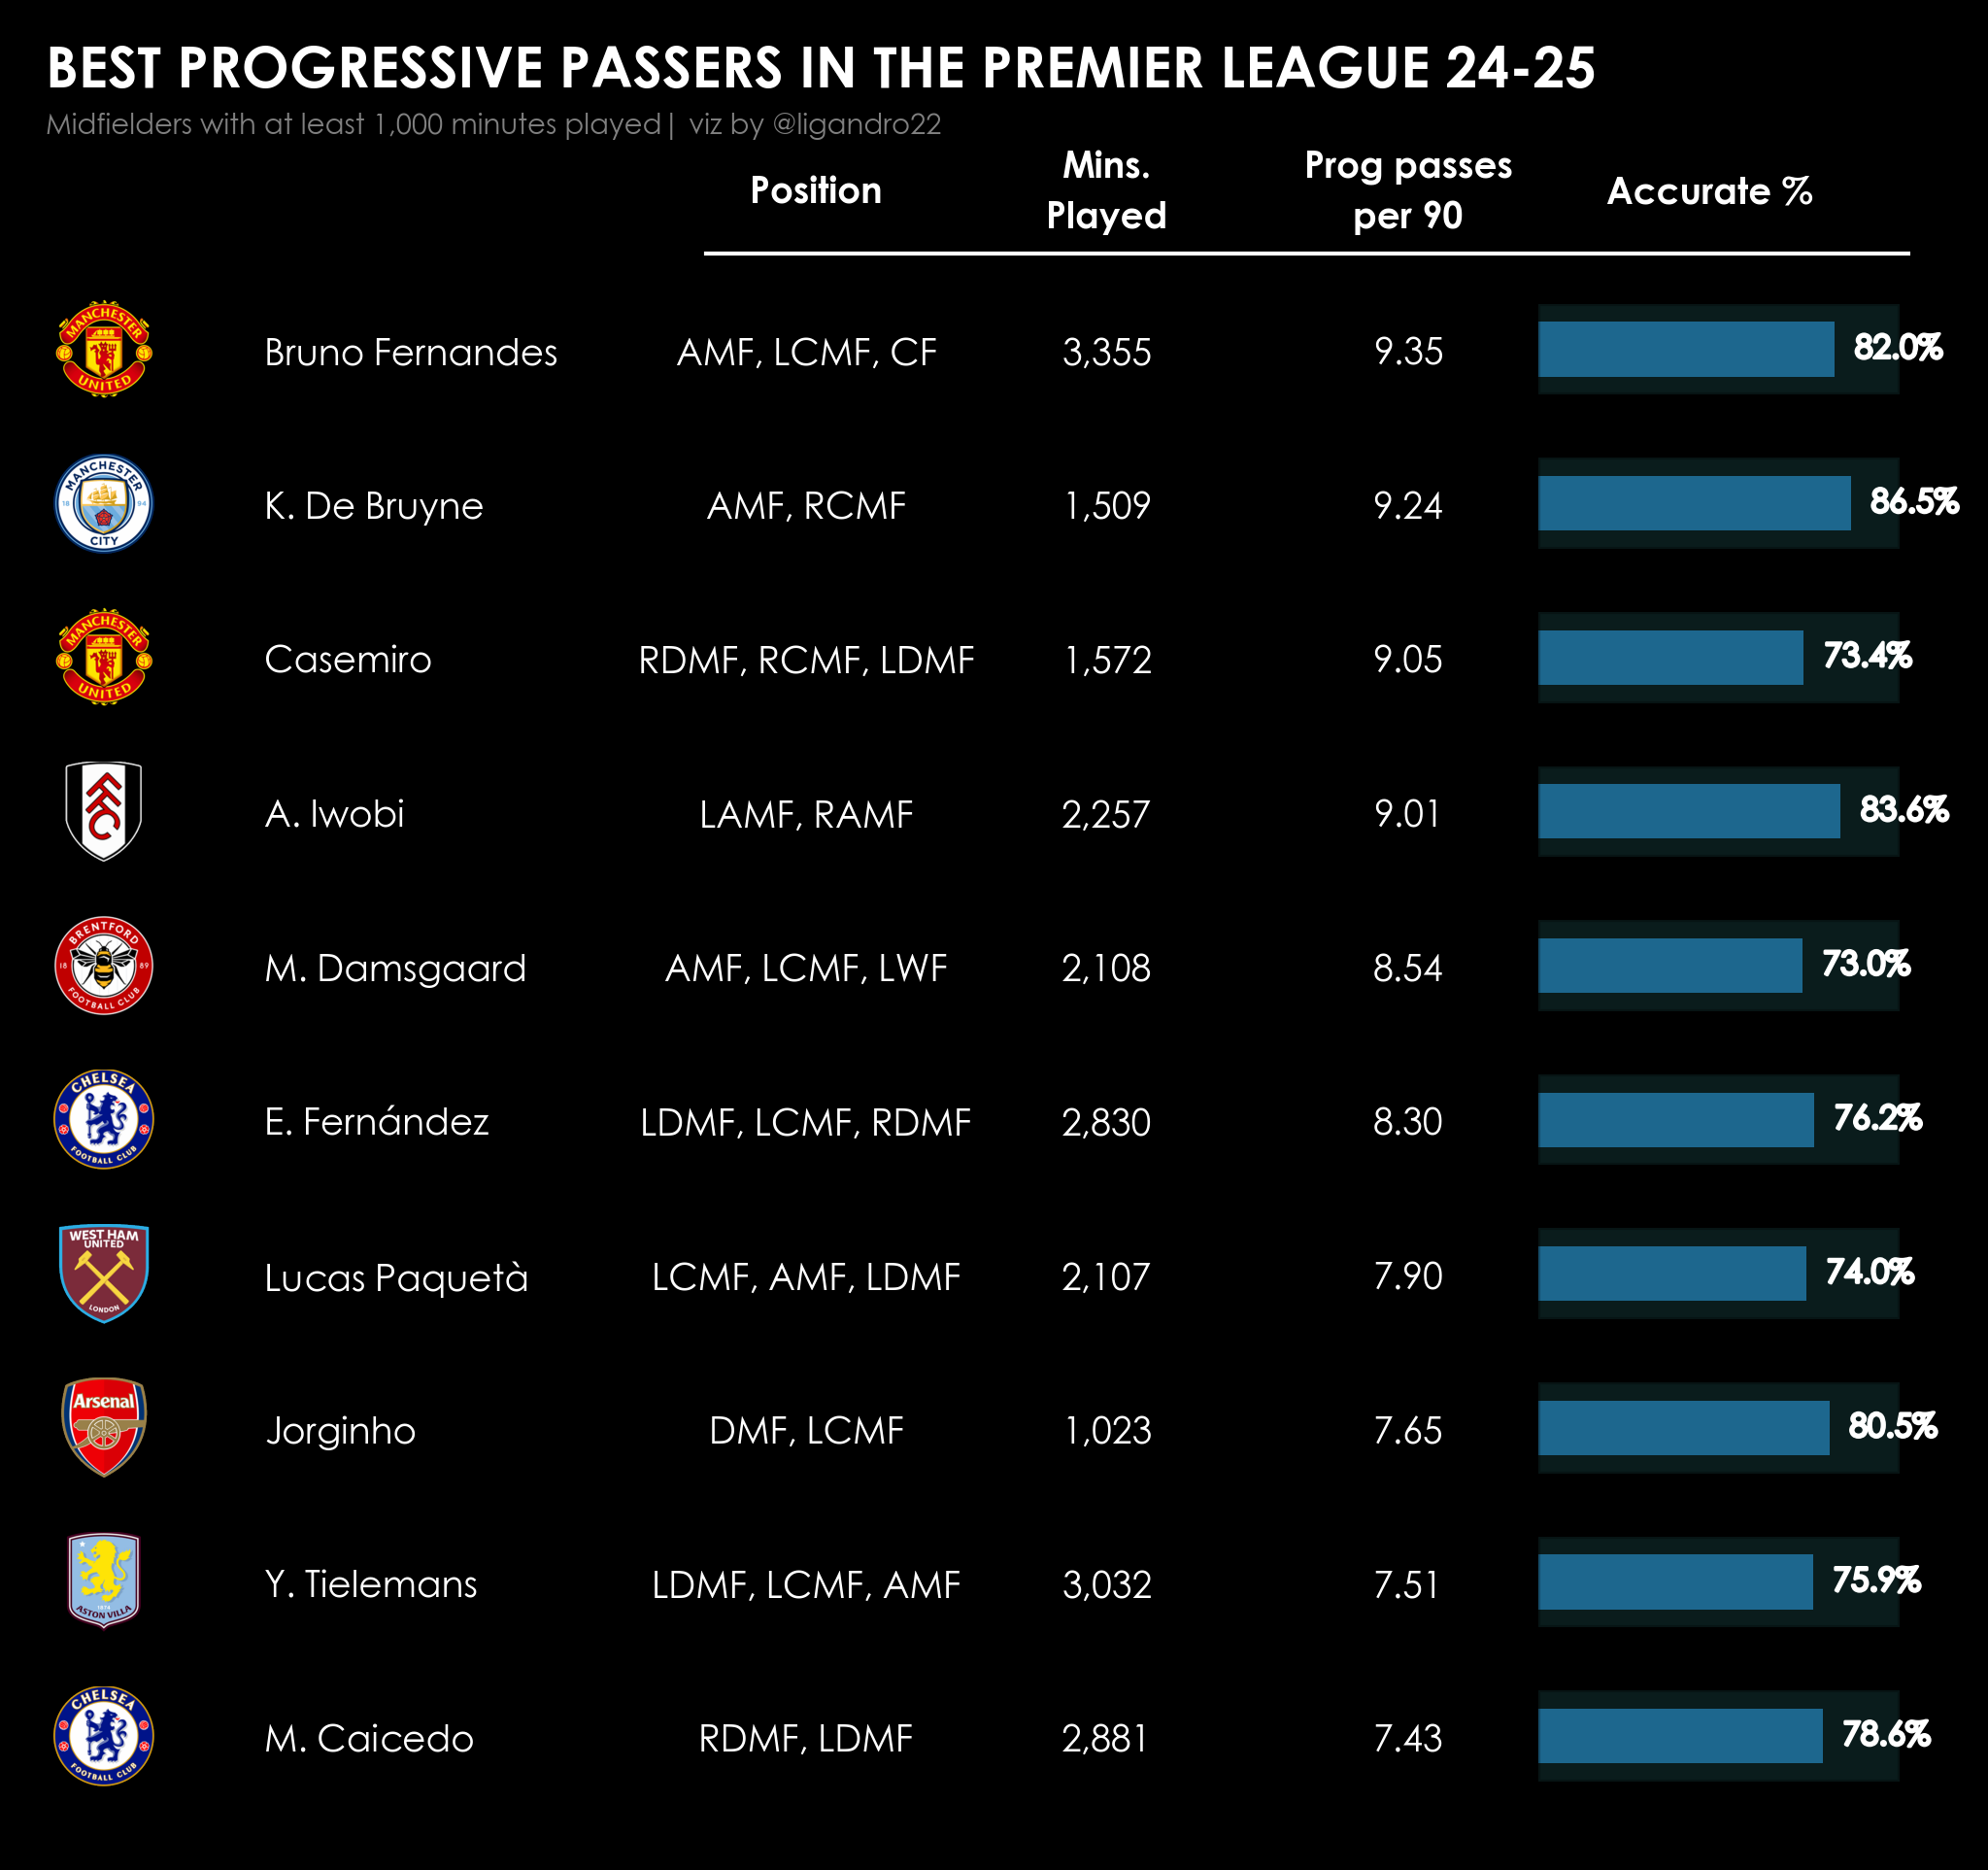

In [68]:
fig = plt.figure(figsize=(8,8), dpi=300)
ax = plt.subplot()



fig.set_facecolor('black')
ax.patch.set_facecolor('black')

nrows = data_clean.shape[0]
ncols = data_clean.shape[1] # because I want to remove aprox. 3 columns from my DF

ax.set_xlim(0, ncols + 1)
ax.set_ylim(-.65, nrows + 1)

# calculate asymmetry of x and y axes: (I have no idea how this works)
x0, y0 = ax.transAxes.transform((0, 0)) # lower left in pixels
x1, y1 = ax.transAxes.transform((1, 1)) # upper right in pixes
dx = x1 - x0
dy = y1 - y0
maxd = max(dx, dy)
width = .26 * maxd / dx
height = .81 * maxd / dy

# Iterate
for y in range(0, nrows):
    # -- Club Logo
    bbox = Bbox.from_bounds(-0.5, y - .295, 1, .65)
    logo_ax = fig.add_axes([0, 0, 0, 0], axes_locator=BboxLocator(bbox, ax.transData))
    draw_club_image_at_ax(data_clean['team_id'].iloc[y], logo_ax)
    # -- Player picture
    # circle = Ellipse((1.15, y), width, height, ec='grey', fc=fig.get_facecolor(), transform=ax.transData, lw=.65)
    # bbox = Bbox.from_bounds(.65, y - .295, 1, .65)
    # logo_ax = fig.add_axes([0, 0, 0, 0], axes_locator=BboxLocator(bbox, ax.transData))
    # draw_player_image_at_ax(data_clean['player_id'].iloc[y], logo_ax)
    # ax.add_artist(circle)
    # -- Player name
    ax_text(
        x=0.8, y=y,
        s=data_clean['Player'].iloc[y],
        weight='bold', size=9,color="white",
        ha='left', va='center', ax=ax, family='STXihei'
    )
    ax_text(
        x=3.5, y=y,
        s=data_clean['Position'].iloc[y],
        size=9,color="white",
        ha='center', va='center', ax=ax, family='STXihei'
    ) 
    # -- Minutes played
    ax_text(
        x=5, y=y,
        s=f"{data_clean['Minutes played'].iloc[y]:,.0f}",
        size=9,color="white",
        ha='center', va='center', ax=ax, family='STXihei'
    )
    # # -- Crosses
    ax_text(
        x=6.5, y=y,
        s=f"{data_clean['Progressive passes per 90'].iloc[y]:,.2f}",
        size=9,color="white",
        ha='center', va='center', ax=ax, family='STXihei'
    )
    # # -- Battery Chart
    bbox = Bbox.from_bounds(7.15, y - .295, 1.8, .65)
    battery_ax = fig.add_axes([0, 0, 0, 0], axes_locator=BboxLocator(bbox, ax.transData))
    battery_ax.set_xlim(0,100)
    battery_ax.barh(y=.5, width=data_clean['Accurate progressive passes, %'].iloc[y], height=.3, alpha=.85)
    battery_ax.barh(y=.5, width=100, height=.5, alpha=.25, color='#287271', ec='black')
    text_ = battery_ax.annotate(
        xy=(data_clean['Accurate progressive passes, %'].iloc[y], .5),
        xytext=(5,0), family='STXihei',
        textcoords='offset points',color="white",
        text=f"{data_clean['Accurate progressive passes, %'].iloc[y]/100:.1%}",
        ha='left', va='center',
        size=8
    )
    text_.set_path_effects(
                [path_effects.Stroke(linewidth=.75, foreground="white"), 
                path_effects.Normal()]
            )
    battery_ax.set_axis_off()
    

# # -- Draw border lines
# ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows - .5, nrows - .5], lw=1, color='black', zorder=3)
# ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [-.5, -.5], lw=1, color='black', zorder=3)
# for x in range(nrows):
#     if x % 2 == 0:
#         ax.fill_between(x=[ax.get_xlim()[0], ax.get_xlim()[1]], y1=x-.5, y2=x+.5, color='grey', zorder=-1)
#     ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x - .5, x - .5], lw=1, color='grey', ls=':', zorder=3)

ax.set_axis_off()


# -- Column titles

# ax_text(
#     x=0, y=nrows + .05,
#     s='Team',
#     size=9,font="Century Gothic",color="white",
#     ha='center', va='center', ax=ax,
#     textalign='center', weight='bold'
# )
# ax_text(
#     x=1.3, y=nrows + .05,
#     s='Player',
#     size=9,font="Century Gothic",color="white",
#     ha='center', va='center', ax=ax,
#     textalign='center', weight='bold'
# )
ax_text(
    x=3.55, y=nrows + .05,
    s='Position',color="white",
    size=9,font="Century Gothic",
    ha='center', va='center', ax=ax,
    textalign='center', weight='bold'
)

ax_text(
    x=5, y=nrows + .05,
    s='Mins.\nPlayed',
    size=9,font="Century Gothic",color="white",
    ha='center', va='center', ax=ax,
    textalign='center', weight='bold'
)
ax_text(
    x=6.5, y=nrows + .05,
    s='Prog passes\nper 90',
    size=9,font="Century Gothic",color="white",
    ha='center', va='center', ax=ax,
    textalign='center', weight='bold'
)
ax_text(
    x=8, y=nrows + .05,
    s='Accurate %',color="white",
    size=9,font="Century Gothic",
    ha='center', va='center', ax=ax,
    textalign='center', weight='bold'
)

ax.plot([3, ax.get_xlim()[1]], [nrows - .35, nrows - .35], lw=1, color='white', zorder=3)

fig_text(
    x = 0.1, y = .858, 
    s = "BEST PROGRESSIVE PASSERS IN THE PREMIER LEAGUE 24-25",
    va = "bottom", ha = "left",color="white",
    fontsize = 14,font = "Century Gothic", weight = "bold"
)
fig_text(
	x = 0.1, y = .84, 
    s = "Midfielders with at least 1,000 minutes played| viz by @ligandro22",
	va = "bottom", ha = "left",
	fontsize = 7, color = "grey", font = "Century Gothic"
)

plt.savefig("AFC VS ARS.jpg",dpi =500, bbox_inches='tight')

## 3) Selected Players

In [4]:
liga = pd.read_excel(r"C:\Users\lolen\Downloads\Wyscout Data\2425\MidEngM.xlsx")# 23-24
liga2 = pd.read_excel(r"C:\Users\lolen\Downloads\Wyscout Data\2425\Nypan.xlsx")

In [14]:
codes_logo = { "Liverpool" :8650,  "Manchester City" :  8456,"Arsenal" :9825, "Tottenham Hotspur" :  8586, "Brighton" :10204,
                          "Leeds United" :8463,
                         "Chelsea" :8455,
                      "Brentford" :9937,
               "Newcastle United" :10261,
                         "Fulham" :9879, "Crystal Palace" :9826,
              "Manchester United" :10260,
                         "Everton" :8668,
                     "Southampton":8466,
                     "Aston Villa" :10252,
              "Nott'ham Forest":10203,
       "Wolverhampton Wanderers":8602,
                        "West Ham United" :8654,'Burnley':8191,
                       "Leicester City" : 8197,
                   "Bournemouth" :8678,"Luton Town":8346,'Sheffield United':8657,"Rosenborg" :8422 }

In [10]:
data_clean = liga.sort_values(by="Progressive passes per 90",ascending=False)
data_clean = data_clean[data_clean['Position'].str.contains('MF')]
data_clean =data_clean[data_clean["Minutes played"] > 1000]
data_clean =data_clean[data_clean["Age"] < 22]

In [12]:
data_clean = pd.concat([data_clean, liga2])

In [15]:
data_clean['team_id'] = data_clean['Team'].map(codes_logo)

In [20]:
data_clean.sort_values(by="Progressive passes per 90",ascending=False)[:5]

,Player,Team,Position,Age,Matches played,Minutes played,Foot,Successful defensive actions per 90,Defensive duels per 90,"Defensive duels won, %",...,"Accurate passes to final third, %",Passes to penalty area per 90,"Accurate passes to penalty area, %",Through passes per 90,"Accurate through passes, %",Deep completions per 90,Deep completed crosses per 90,Progressive passes per 90,"Accurate progressive passes, %",team_id
162,B. El Khannouss,Leicester City,"AMF, CF, LCMF",20,24,1357,right,5.90,5.84,57.95,...,78.00,2.59,53.85,0.93,21.43,0.86,0.53,6.70,69.31,8197.0
147,Y. Ayari,Brighton,"LCMF, LDMF, RCMF",21,27,1895,right,7.93,6.46,63.24,...,69.32,2.99,53.97,0.85,27.78,1.71,0.43,5.56,76.92,10204.0
155,A. Fatawu,Leicester City,"RAMF, RW",20,18,1053,left,7.35,7.78,60.44,...,53.33,4.36,47.06,0.43,20.00,1.20,1.79,5.30,87.10,8197.0
106,J. Hinshelwood,Brighton,"LB, LDMF, RB",19,12,1050,right,6.94,5.66,69.70,...,78.05,1.54,50.00,0.00,0.00,0.51,0.34,5.23,70.49,10204.0
160,Mateus Fernandes,Southampton,"AMF, LW, LCMF",20,25,2029,right,7.23,7.36,59.04,...,78.13,2.66,50.00,0.31,42.86,1.20,0.40,5.19,64.96,8466.0


In [16]:
data_clean.columns

Index(['Player', 'Team', 'Position', 'Age', 'Matches played', 'Minutes played',
       'Foot', 'Successful defensive actions per 90', 'Defensive duels per 90',
       'Defensive duels won, %', 'Aerial duels per 90', 'Aerial duels won, %',
       'Sliding tackles per 90', 'PAdj Sliding tackles',
       'Shots blocked per 90', 'Interceptions per 90', 'PAdj Interceptions',
       'Fouls per 90', 'Successful attacking actions per 90', 'Goals per 90',
       'Non-penalty goals per 90', 'xG per 90', 'Head goals per 90',
       'Shots per 90', 'Shots on target, %', 'Goal conversion, %',
       'Assists per 90', 'Crosses per 90', 'Accurate crosses, %',
       'Crosses from left flank per 90', 'Accurate crosses from left flank, %',
       'Crosses from right flank per 90',
       'Accurate crosses from right flank, %', 'Crosses to goalie box per 90',
       'Dribbles per 90', 'Successful dribbles, %', 'Offensive duels per 90',
       'Offensive duels won, %', 'Touches in box per 90',
       'Pr

In [ ]:
data_clean = data_clean[['Player','Team','Position','Age','Progressive passes per 90','Accurate progressive passes, %','team_id']]